# Test Animated 3D plotting

## 1. Animated 2D

In [28]:
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


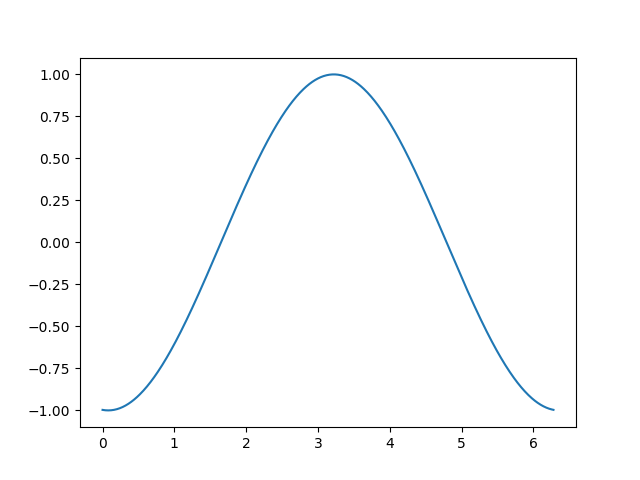

In [3]:
"""
A simple example of an animated plot
From: https://matplotlib.org/examples/animation/simple_anim.html
"""
fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i/10.0))  # update the data
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), init_func=init,
                              interval=25, repeat=False, blit=True)
plt.show()

<IPython.core.display.Javascript object>


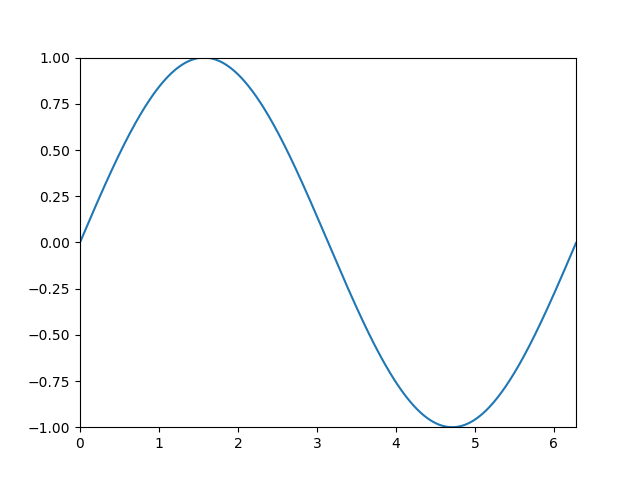

In [5]:
# A variation
plt.close()
fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
y = np.sin(x)
xdata = []
ydata = []
line, = ax.plot(xdata,ydata)
ax.set_xlim(min(x),max(x))
ax.set_ylim(min(y),max(y))

def animate(i):
    xdata.append(x[i])
    ydata.append(y[i])
    line.set_xdata(xdata)
    line.set_ydata(ydata)
#     ax.autoscale()
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(ydata)
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, len(x)), init_func=init,
                              interval=40, repeat=False, blit=True)
plt.show()

## 2. Animated 3D

In [3]:
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


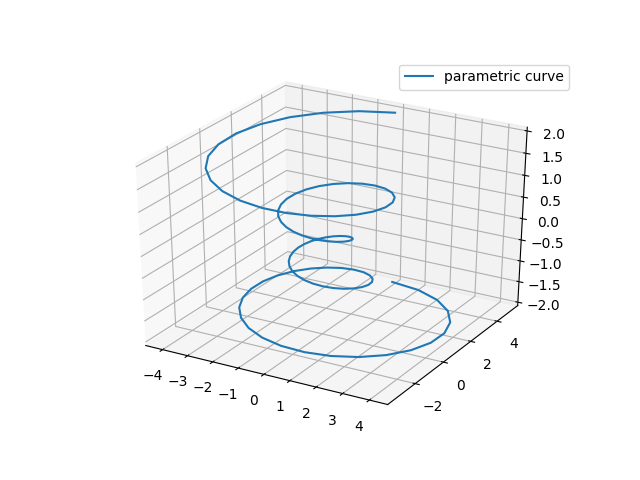

In [7]:
# Sample 3D plot, from: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
plt.close()
fig = plt.figure()
ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()

<IPython.core.display.Javascript object>


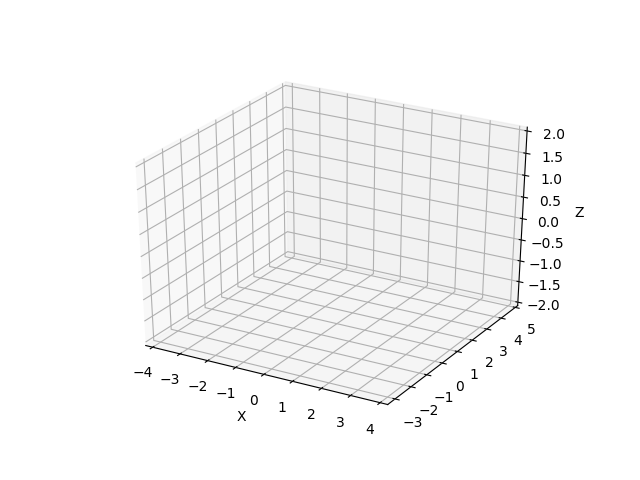

In [4]:
# Animated version
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
plt.close()
fig = plt.figure()
ax = fig.gca(projection='3d')
xdata = []
ydata = []
zdata = []
line, = ax.plot(xdata, ydata, zdata, label='parametric curve', color='b')
ax.legend()
ax.set_xlabel("X")
ax.set_zlabel("Z")
ax.set_xlim3d(min(x),max(x))
ax.set_ylim3d(min(y),max(y))
ax.set_zlim3d(min(z),max(z))

def animate(i):
#     ax.cla()
#     ax.lines[-1].remove()
    for line in ax.lines:
        line.remove()
    xdata.append(x[i])
    ydata.append(y[i])
    zdata.append(z[i])
#     ax.lines.pop(-1)
    ax.plot(xdata, ydata, zdata, lw=2, color='b')
    ax.plot([xdata[-1]],[ydata[-1]],[zdata[-1]],marker='o',color='r')
    plt.draw()
    return True


# Init only required for blitting to give a clean slate.
def init():
#     ax.clear()
#     ax.set_xlim3d(min(x),max(x))
#     ax.set_ylim3d(min(y),max(y))
#     ax.set_zlim3d(min(z),max(z))     
#     ax.lines[-1].remove()
    pass
    return True

ani = animation.FuncAnimation(fig, animate, np.arange(0, len(x)), init_func=init, 
                              interval=40, repeat=False, blit=True)
plt.show()

In [26]:
l = ax.lines[0]

In [40]:
# l.get_xydata()
l.set_data?

In [46]:
l.get_xdata()
# x

array([ 3.29478307e-02,  4.09895726e-02,  4.56870559e-02,  4.68474648e-02,
        4.45022944e-02,  3.89216221e-02,  3.06067895e-02,  2.02565116e-02,
        8.70688513e-03, -3.14777057e-03, -1.44411051e-02, -2.44138941e-02,
       -3.24741754e-02, -3.82315231e-02, -4.15047600e-02, -4.23074678e-02,
       -4.08184035e-02, -3.73442881e-02, -3.22810855e-02, -2.60777979e-02,
       -1.92047546e-02, -1.21268198e-02, -5.28103909e-03,  9.42059547e-04,
        6.21416151e-03,  1.02820947e-02,  1.29777270e-02,  1.42241289e-02,
        1.40370714e-02,  1.25210087e-02,  9.85912231e-03,  6.29770065e-03,
        2.12596417e-03, -2.34680702e-03, -6.81452233e-03, -1.09955414e-02,
       -1.46499646e-02, -1.75916752e-02, -1.96946937e-02, -2.08941857e-02,
       -2.11830414e-02, -2.06052573e-02, -1.92474001e-02, -1.72292892e-02,
       -1.46947736e-02, -1.18031768e-02, -8.72169927e-03, -5.61882781e-03,
       -2.65863230e-03,  4.27861346e-06,  2.22941071e-03,  3.89489639e-03,
        4.90204323e-03,  

### Save animation as movie

In [36]:
# plt.rcParams['animation.ffmpeg_path'] = 'C:\\Users\\Minh-Hai\\Documents\\Softwares\\ffmpeg\\bin'

In [15]:
moview.to_html5_video()

'<video width="1000" height="800" controls autoplay>\n  <source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAADuM21kYXQAAAKuBgX//6rcRem9\n5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIHIyODUxIGJhMjQ4OTkgLSBILjI2NC9NUEVHLTQg\nQVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE3IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv\neDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9\nMHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm\nPTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6\nb25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9NiBsb29r\nYWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj\nZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh\nbWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl\naWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz\naD0wIHJjX2xvb2thaGVhZD00MCByYz1jcm

In [12]:
FFwriter = animation.FFMpegWriter(fps=30,extra_args=['-vcodec','libx264','-r','25'])
# (fps=30, extra_args=['-vcodec', 'libx264'])
moview.save('sample_animation.mp4', writer = FFwriter)

In [16]:
Writer = animation.writers['ffmpeg']
# writer3 = Writer(fps=25, extra_args=['-vcodec','libx264','-r', '25'])
writer3 = Writer(fps=4, extra_args=['-vcodec','libx264'])
moview.save('sample_animation.mp4', writer = writer3)

## 3. Animation with multi-panes

<IPython.core.display.Javascript object>


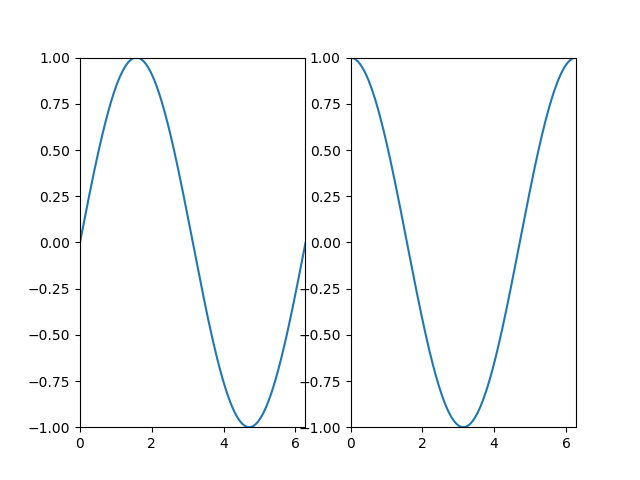

In [17]:
plt.close()
fig, (ax1,ax2) = plt.subplots(1,2)

x = np.arange(0, 2*np.pi, 0.01)
y1 = np.sin(x)
y2 = np.cos(x)
xdata = []
ydata1 = []
ydata2 = []
line1, = ax1.plot(xdata,ydata1)
line2, = ax2.plot(xdata,ydata2)
ax1.set_xlim(min(x),max(x))
ax1.set_ylim(min(y1),max(y1))
ax2.set_xlim(min(x),max(x))
ax2.set_ylim(min(y2),max(y2))

def animate(i):
    xdata.append(x[i])
    ydata1.append(y1[i])
    ydata2.append(y2[i])
    line1.set_xdata(xdata)
    line1.set_ydata(ydata1)
    line2.set_xdata(xdata)
    line2.set_ydata(ydata2)
#     ax.autoscale()
    return True


# Init only required for blitting to give a clean slate.
def init():
    pass
    return True

ani = animation.FuncAnimation(fig, animate, np.arange(0, len(x)), init_func=init,
                              interval=40, repeat=False, blit=True)
plt.show()

## 4. Animation class

In [5]:
import spinanimation
import importlib

In [6]:
importlib.reload(spinanimation)
xs = np.linspace(-1,1,100)
thetas = np.arccos(xs)
phis = np.arcsin(xs)
ani = spinanimation.SpinAnimation([thetas,phis],average=1,view='xyz')

<IPython.core.display.Javascript object>


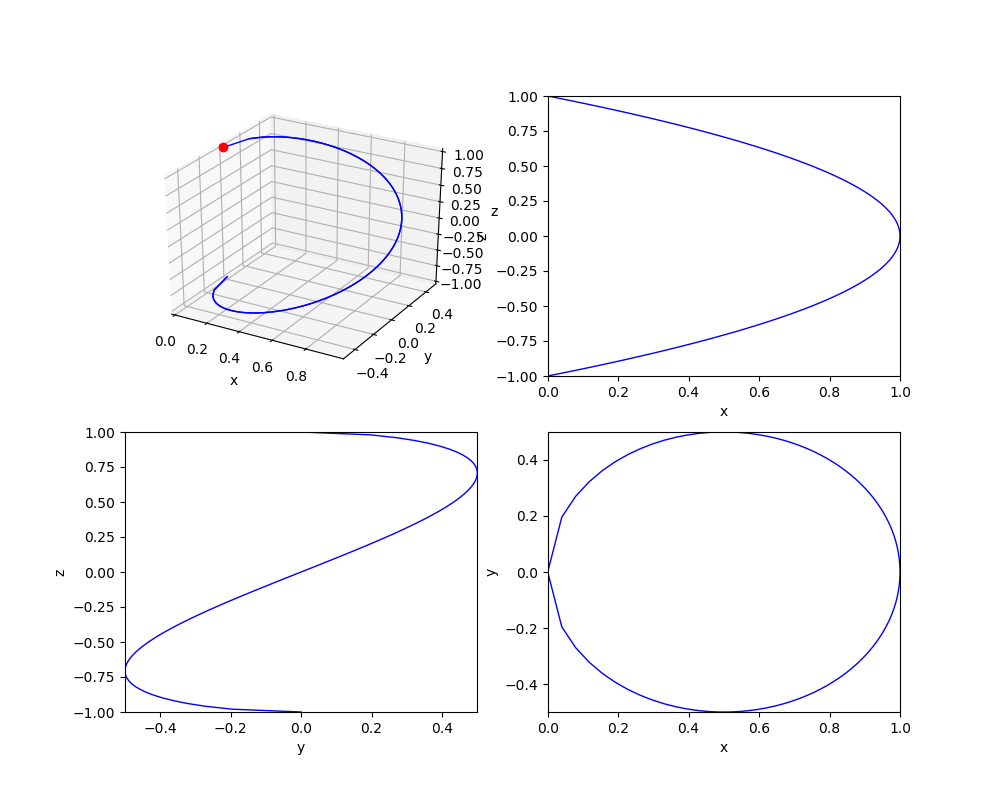

In [7]:
ani.init_figure(figsize=(10,8))
moview = ani.animate()

In [103]:
xs = np.linspace(-6,6,100)
ys = np.sin(xs)
zs = np.cos(xs)
ani = test_animation.SpinAnimation([xs,ys,zs],average=1,view='angle')

<IPython.core.display.Javascript object>


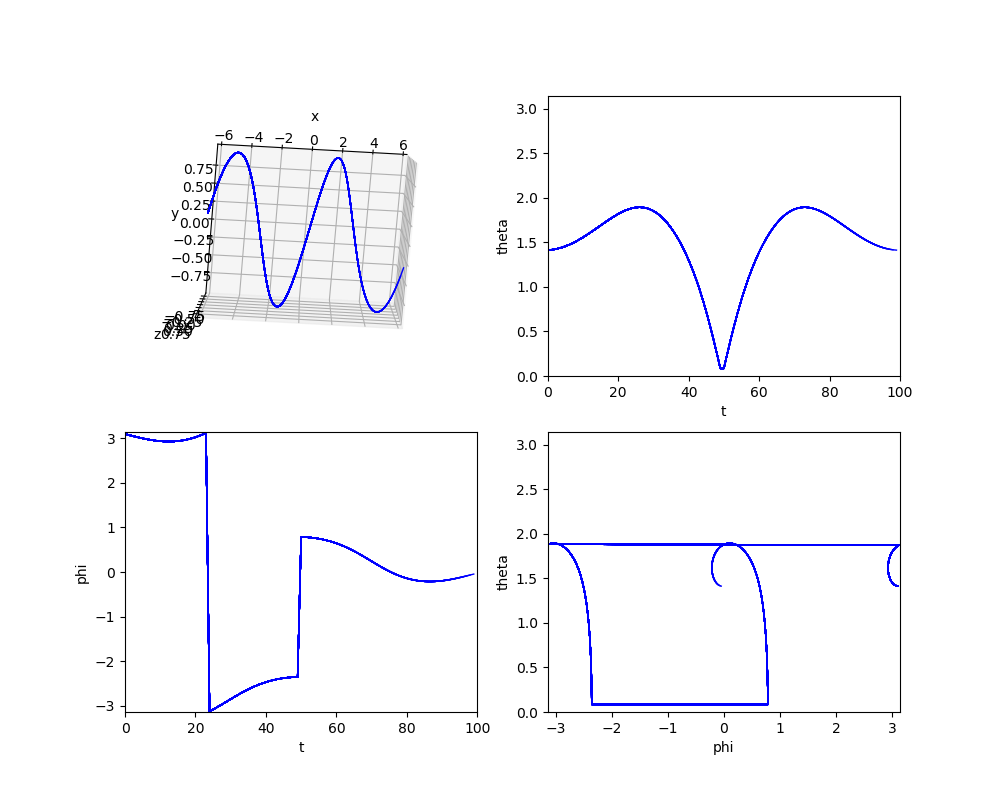

In [104]:
ani.view = "angle"
ani.init_figure(figsize=(10,8))
ani.animate()

### Sample from Matplotlib

In [1]:
"""
===================
Saving an animation
===================

This example showcases the same animations as `basic_example.py`, but instead
of displaying the animation to the user, it writes to files using a
MovieWriter instance.
"""

# -*- noplot -*-
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def update_line(num, data, line):
    line.set_data(data[..., :num])
    return line,

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)


fig1 = plt.figure()

data = np.random.rand(2, 25)
l, = plt.plot([], [], 'r-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.title('test')
line_ani = animation.FuncAnimation(fig1, update_line, 25, fargs=(data, l),
                                   interval=50, blit=True)
line_ani.save('lines.mp4', writer=writer)

fig2 = plt.figure()

x = np.arange(-9, 10)
y = np.arange(-9, 10).reshape(-1, 1)
base = np.hypot(x, y)
ims = []
for add in np.arange(15):
    ims.append((plt.pcolor(x, y, base + add, norm=plt.Normalize(0, 30)),))

im_ani = animation.ArtistAnimation(fig2, ims, interval=50, repeat_delay=3000,
                                   blit=True)
im_ani.save('im.mp4', writer=writer)